<h1 style="text-align: center;">USD-LKR Currency Exchange Prediction</h1>

In [133]:
import warnings
warnings.filterwarnings('ignore')

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [135]:
# reading the dataset
df = pd.read_csv('Original Datasets/USD_Data.csv')
df

,Date,Price,Open,High,Low,Vol.,Change %
0,05/09/2024,300.430,300.325,300.430,300.325,NaN,0.03%
1,05/08/2024,300.325,299.753,300.325,299.753,NaN,0.19%
2,05/07/2024,299.753,296.965,299.753,296.875,NaN,0.59%
3,05/06/2024,298.000,297.125,298.700,297.125,NaN,0.34%
4,05/03/2024,297.000,296.850,297.350,296.800,NaN,0.03%
...,...,...,...,...,...,...,...
3684,01/07/2010,114.310,114.300,114.370,114.250,NaN,-0.01%
3685,01/06/2010,114.325,114.300,114.355,114.200,NaN,0.00%
3686,01/05/2010,114.325,114.280,114.395,114.250,NaN,-0.11%
3687,01/04/2010,114.450,114.400,114.500,114.370,NaN,0.04%


In [136]:
df.dtypes

Date         object
Price       float64
Open        float64
High        float64
Low         float64
Vol.         object
Change %     object
dtype: object

In [137]:
df['Date'] = pd.to_datetime(df['Date'])
df.dtypes

Date        datetime64[ns]
Price              float64
Open               float64
High               float64
Low                float64
Vol.                object
Change %            object
dtype: object

In [138]:
# dropping the volumen column as it is null
df.drop(columns=["Vol."], inplace=True)
df

,Date,Price,Open,High,Low,Change %
0,2024-05-09,300.430,300.325,300.430,300.325,0.03%
1,2024-05-08,300.325,299.753,300.325,299.753,0.19%
2,2024-05-07,299.753,296.965,299.753,296.875,0.59%
3,2024-05-06,298.000,297.125,298.700,297.125,0.34%
4,2024-05-03,297.000,296.850,297.350,296.800,0.03%
...,...,...,...,...,...,...
3684,2010-01-07,114.310,114.300,114.370,114.250,-0.01%
3685,2010-01-06,114.325,114.300,114.355,114.200,0.00%
3686,2010-01-05,114.325,114.280,114.395,114.250,-0.11%
3687,2010-01-04,114.450,114.400,114.500,114.370,0.04%


In [139]:
# checking for any empty values
df.isnull().sum()

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64

## Visualizations

### 1. Date Against Parameters

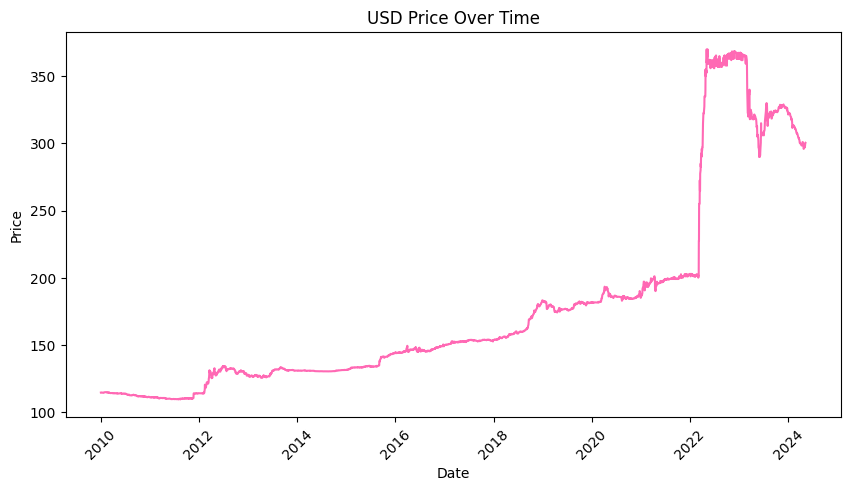

In [140]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Price"], color='hotpink')
plt.title("USD Price Over Time")
plt.xlabel("Date")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

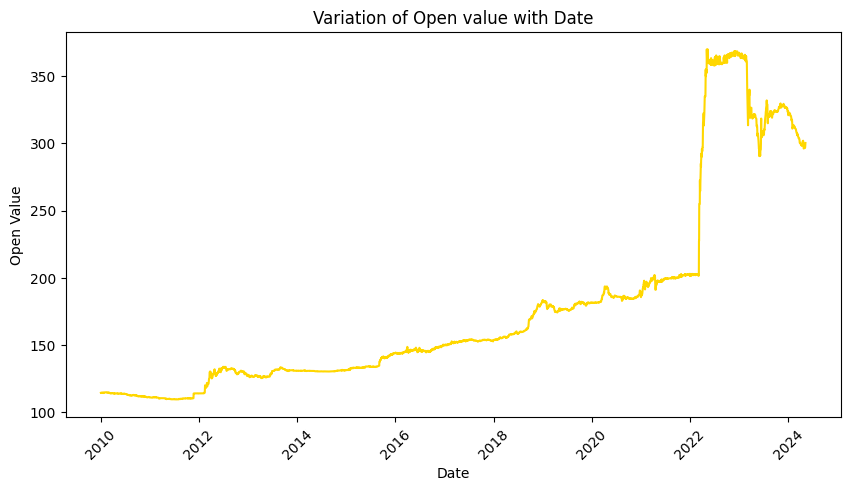

In [141]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Open"], color='gold')
plt.title("Variation of Open value with Date")
plt.xlabel("Date")
plt.ylabel("Open Value")
plt.xticks(rotation=45)
plt.show()

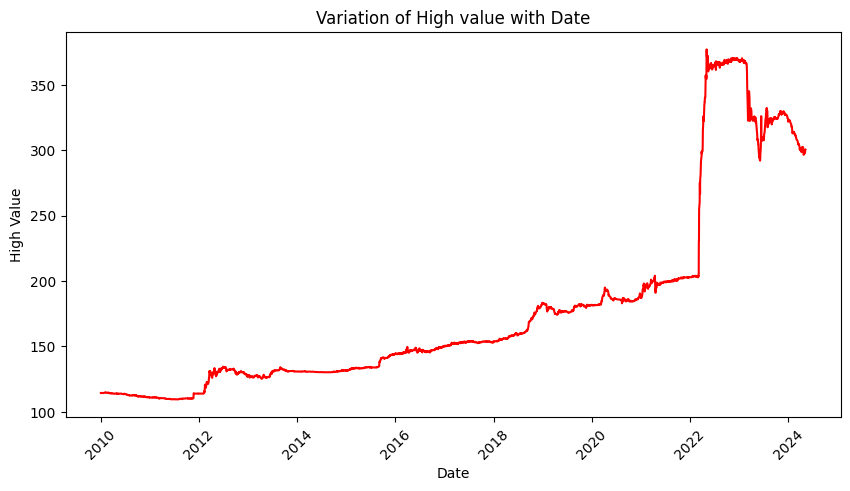

In [142]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["High"], color='red')
plt.title("Variation of High value with Date")
plt.xlabel("Date")
plt.ylabel("High Value")
plt.xticks(rotation=45)
plt.show()

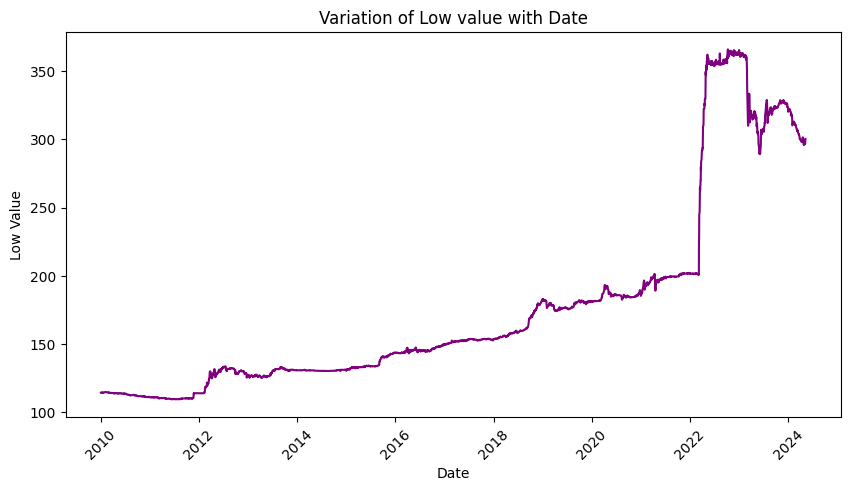

In [143]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Date"], y=df["Low"], color='purple')
plt.title("Variation of Low value with Date")
plt.xlabel("Date")
plt.ylabel("Low Value")
plt.xticks(rotation=45)
plt.show()

We can see that all four parameters follow the same pattern over the time region.

### 2. Price Against Parameters

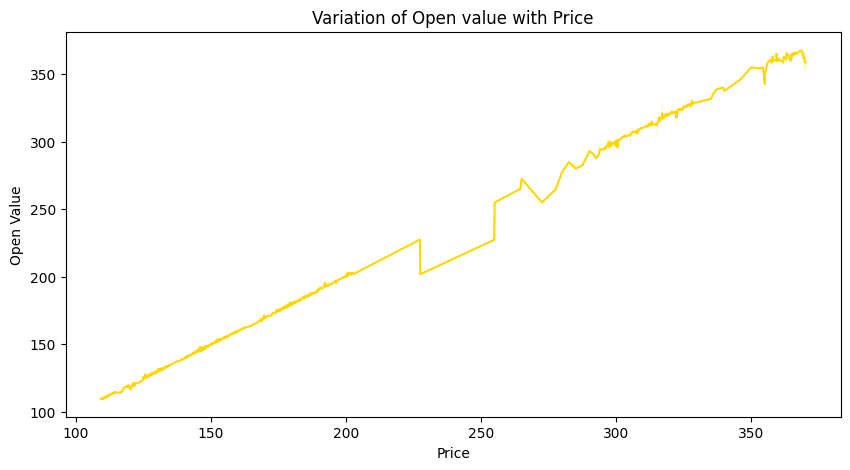

In [144]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["Open"], color='gold')
plt.title("Variation of Open value with Price")
plt.xlabel("Price")
plt.ylabel("Open Value")
plt.show()

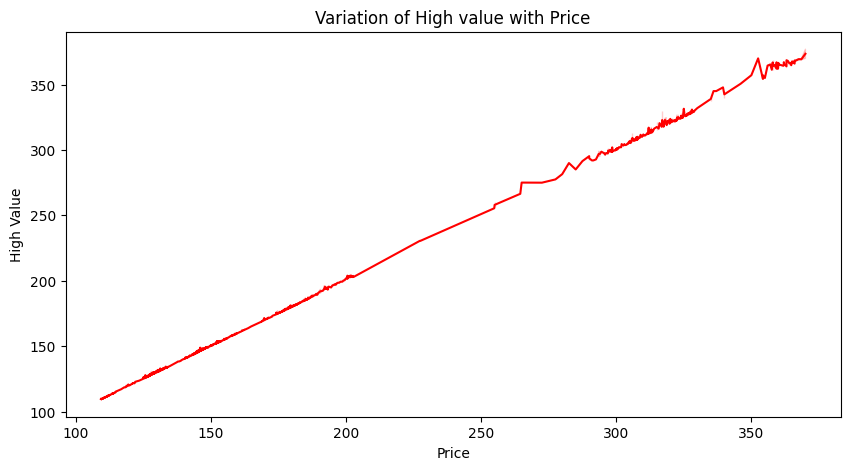

In [145]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["High"], color='red')
plt.title("Variation of High value with Price")
plt.xlabel("Price")
plt.ylabel("High Value")
plt.show()

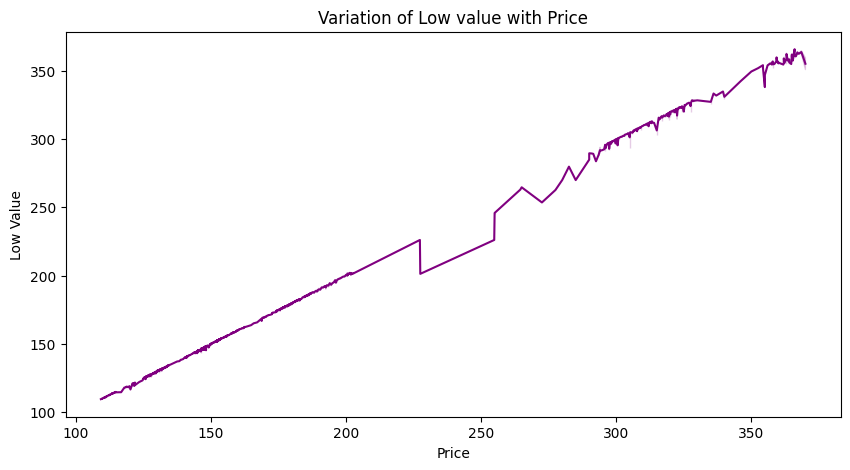

In [146]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df["Price"], y=df["Low"], color='purple')
plt.title("Variation of Low value with Price")
plt.xlabel("Price")
plt.ylabel("Low Value")
plt.show()

When the plots are made against the Price, it could be seen that the Open, High and Low parameters are almost directly proportional to the Price value. However slight fluctuations can be noticed at certain time periods.

## Model Synthesis

In [147]:
# dropping the unnecessary columns which wont be needed for the prediction.
df.drop(columns=["Open","High","Low","Change %"], inplace=True)
df

,Date,Price
0,2024-05-09,300.430
1,2024-05-08,300.325
2,2024-05-07,299.753
3,2024-05-06,298.000
4,2024-05-03,297.000
...,...,...
3684,2010-01-07,114.310
3685,2010-01-06,114.325
3686,2010-01-05,114.325
3687,2010-01-04,114.450


In [148]:
from pmdarima import auto_arima
from sklearn.metrics import mean_absolute_error, mean_squared_error

### 1. ARIMA Model

4 1 0
                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 2951
Model:                 ARIMA(4, 1, 0)   Log Likelihood               -5346.328
Date:                Thu, 09 May 2024   AIC                          10702.656
Time:                        12:58:15   BIC                          10732.604
Sample:                             0   HQIC                         10713.438
                               - 2951                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1141      0.006    -19.618      0.000      -0.125      -0.103
ar.L2          0.2100      0.004     52.386      0.000       0.202       0.218
ar.L3          0.1687      0.005     32.459   

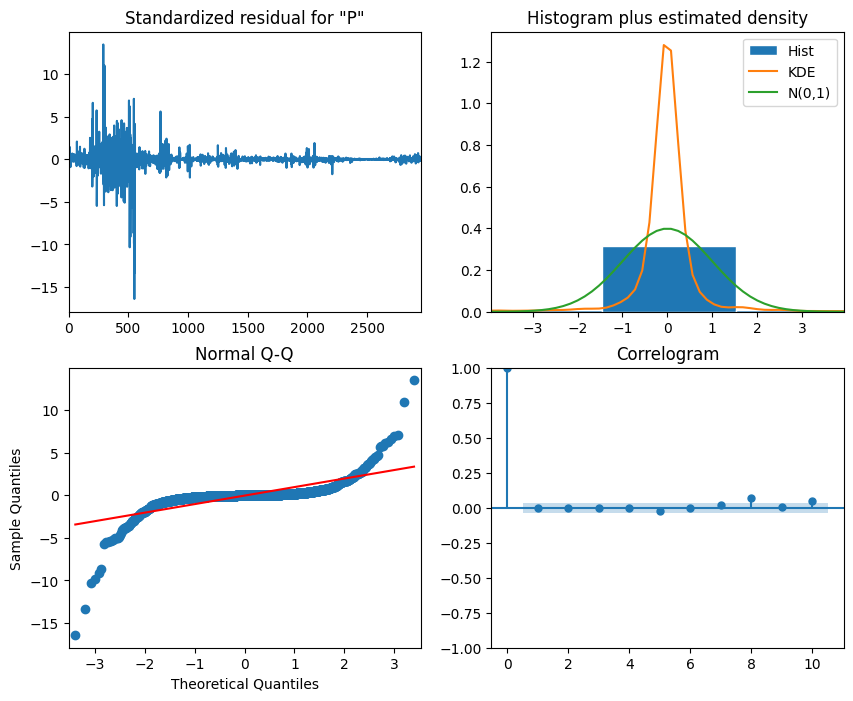

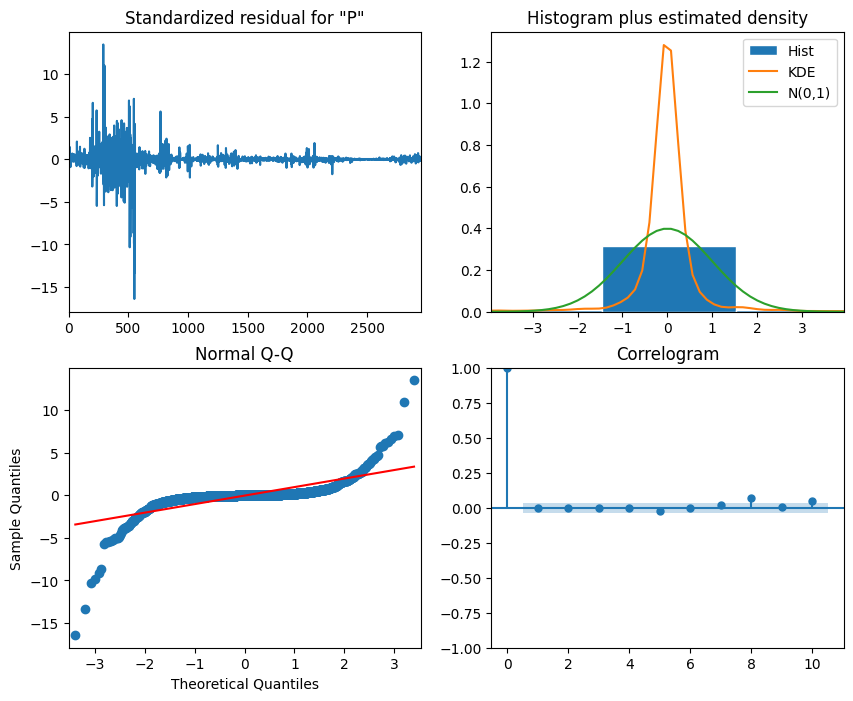

In [149]:
from statsmodels.tsa.arima.model import ARIMA

train_size = int(len(df)*0.8)
train_col, test_col = df.iloc[:train_size], df.iloc[train_size:]

auto_arima_model = auto_arima(train_col['Price'], seasonal=False, trace=False)
p,d,q = auto_arima_model.order
print(p,d,q)
arima_model = ARIMA(train_col['Price'], order=(p,d,q))
arima_model = arima_model.fit()
print(arima_model.summary())
arima_model.plot_diagnostics(figsize=(10,8))

In [150]:
arima_testing_predictions = arima_model.forecast(steps=len(test_col))
mse = mean_squared_error(test_col['Price'], arima_testing_predictions)
mae = mean_absolute_error(test_col['Price'], arima_testing_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error for the ARIMA model is {mse}")
print(f"Mean Absolute Error for the ARIMA model is {mae}")
print(f"Root Mean Sqaured Error for the ARIMA model is {rmse}")

Mean Squared Error for the ARIMA model is 256.160566561117
Mean Absolute Error for the ARIMA model is 14.351418235810895
Root Mean Sqaured Error for the ARIMA model is 16.005016918488934


### 2. SARIMAX Model

4 1 0
                                     SARIMAX Results                                      
Dep. Variable:                              Price   No. Observations:                 2951
Model:             SARIMAX(4, 1, 0)x(4, 1, 0, 12)   Log Likelihood               -5580.456
Date:                            Thu, 09 May 2024   AIC                          11178.911
Time:                                    12:58:26   BIC                          11232.781
Sample:                                         0   HQIC                         11198.309
                                           - 2951                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1159      0.007    -15.506      0.000      -0.131      -0.101
ar.L2          0.1746      0.

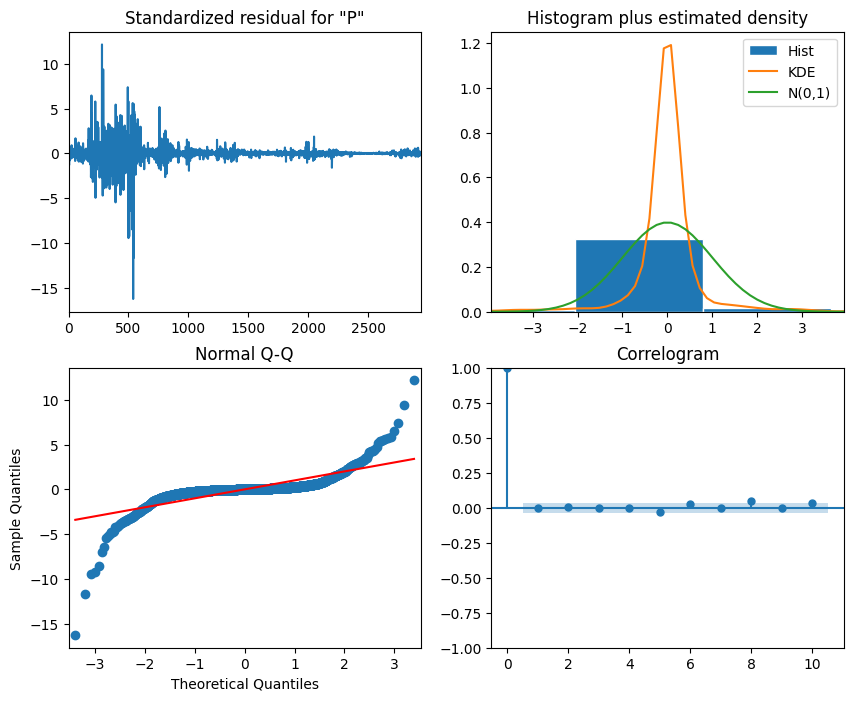

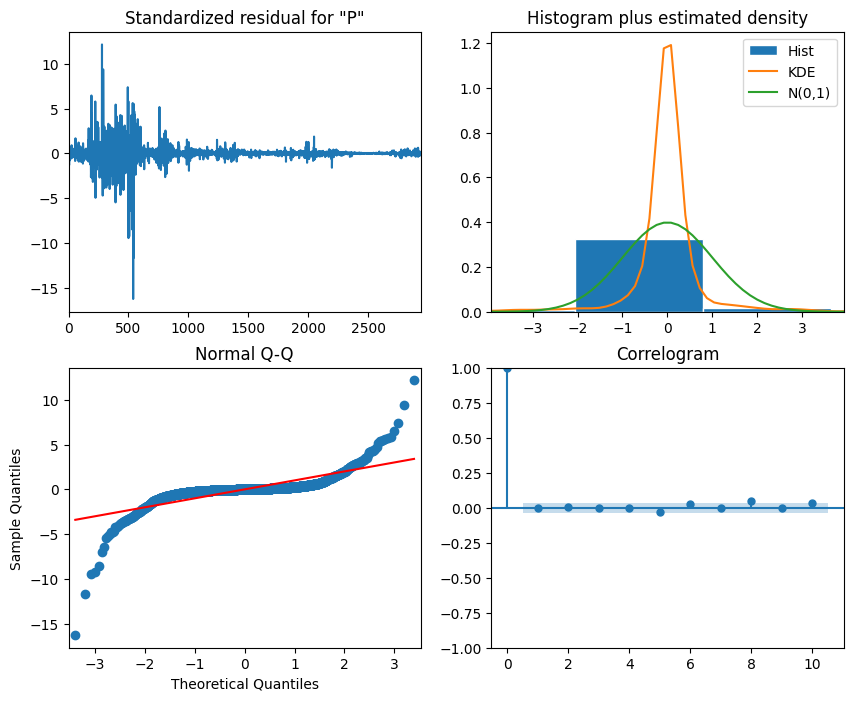

In [151]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

train_size = int(len(df)*0.8)
train_col, test_col = df.iloc[:train_size], df.iloc[train_size:]

print(p,d,q)
sarimax_model = SARIMAX(train_col['Price'], order=(p,d,q), seasonal_order=(p,d,q,12))
sarimax_model = sarimax_model.fit()
print(sarimax_model.summary())
sarimax_model.plot_diagnostics(figsize=(10,8))

In [152]:
sarimax_testing_predictions = sarimax_model.forecast(steps=len(test_col))
mse = mean_squared_error(test_col['Price'], sarimax_testing_predictions)
mae = mean_absolute_error(test_col['Price'], sarimax_testing_predictions)
rmse = np.sqrt(mse)

print(f"Mean Squared Error for the SARIMAX model is {mse}")
print(f"Mean Absolute Error for the SARIMAX model is {mae}")
print(f"Root Mean Sqaured Error for the SARIMAX model is {rmse}")

Mean Squared Error for the SARIMAX model is 1527.0368661792131
Mean Absolute Error for the SARIMAX model is 34.61058973893833
Root Mean Sqaured Error for the SARIMAX model is 39.0773190761497


### 3. LSTM Model

In [153]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

In [154]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

scaler = MinMaxScaler(feature_range=(0,1))
df["Price"] = scaler.fit_transform(df["Price"].values.reshape(-1, 1))

train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]

sequence_length = 10
x_train = create_sequences(train['Price'], sequence_length)
x_test = create_sequences(test['Price'], sequence_length)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(sequence_length, 1)))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(units=1))

print(lstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 50)         │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 10, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,651 (119.73 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

None


In [155]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')

# training the model
lstm_model.fit(x_train, train['Price'][sequence_length:], epochs=100, batch_size=32)

# evaluating the model
loss = lstm_model.evaluate(x_test, test['Price'][sequence_length:])

# predicting the values
lstm_predictions = lstm_model.predict(x_test)

# getting the actual values using inverse transformation
lstm_predictions_actual = scaler.inverse_transform(lstm_predictions)

lstm_actual_vals = scaler.inverse_transform(test["Price"][sequence_length:].values.reshape(-1, 1))

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(lstm_actual_vals, lstm_predictions_actual)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(lstm_actual_vals, lstm_predictions_actual)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error for LSTM model is {mae}")
print(f"Mean Squared Error for LSTM model is {mse}")
print(f"Root Mean Squared Error for LSTM model is {rmse}")

Epoch 1/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.0350
Epoch 2/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 3/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 4/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0014
Epoch 5/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0016
Epoch 6/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0017
Epoch 7/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 8/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 9/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 
Epoch 10/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0010  
Epoch 11/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011
Epoch 12/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011 
Epoch 13/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0011
Epoch 14/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012
Epoch 15/100
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0012


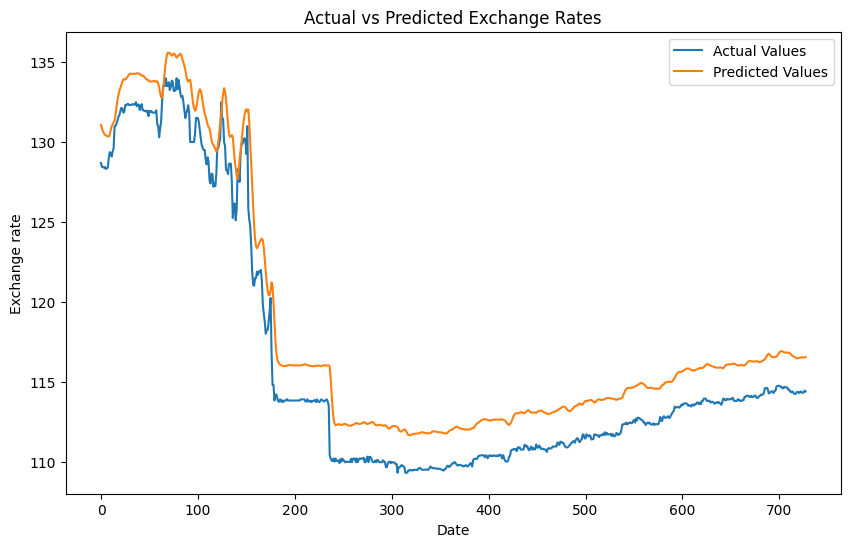

In [156]:
# plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(lstm_actual_vals, label='Actual Values')
plt.plot(lstm_predictions_actual, label='Predicted Values')
plt.title('Actual vs Predicted Exchange Rates')
plt.xlabel("Date")
plt.ylabel("Exchange rate")
plt.legend()
plt.show()

### 4. Analysis

Based on the evaluation metrics for each model, we can come to a conclusion that the Long Short Term Memory Model which makes use of Deep Learning frameworks proves to be the best algorithm for this purpose.